# Ref
* 논문: https://www.researchgate.net/publication/313795371_Optimization_of_P_Median_Problem_in_Python_Using_PuLP_Package
* document: https://coin-or.github.io/pulp/technical/pulp.html
* distance matrix: https://minkithub.github.io/2020/10/05/bicgon5/

# Formula
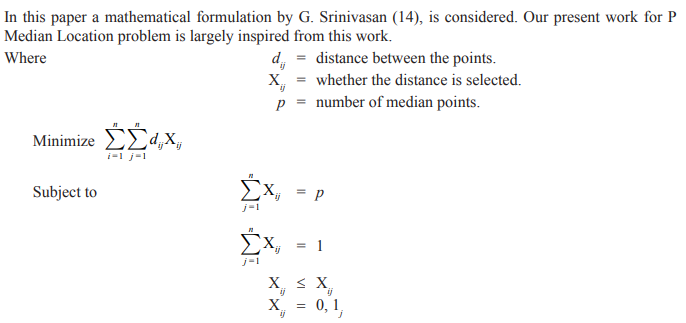
* d: 두 지점 사이의 거리
* X: 해당 지점 선택 유무(0, 1)
* p: 선택할 지점 개수
* 목적함수: d*X 합의 최소화
> 가중치 고려한 수정 필요
* 제약조건: 총 4개, 그림 참고
> 서울시 주거복지센터 입지선정 참고

# Distance Matrix 
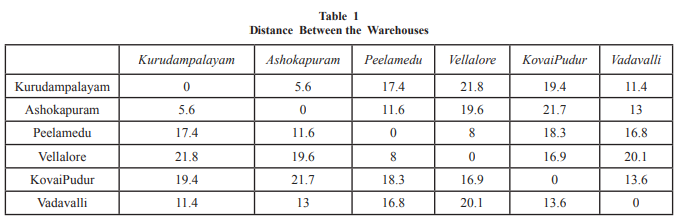
* 우리가 해야될 것: 후보지 간의 거리 행렬 생성
* 후보지: 공원, 공공 체육시설 등 입지 선정 가능한 좌표

In [2]:
!pip install pulp

You should consider upgrading via the 'c:\users\user\anaconda3\python.exe -m pip install --upgrade pip' command.


In [1]:
# import library
from pulp import *

# variable assignment
location = ['1','2','3','4','5','6']
D = dict(zip(location,[dict(zip(location, [0, 5.6, 17.4, 21.8, 19.4, 11.4])),
    dict(zip(location, [5.6, 0, 11.6, 19.6, 21.7, 13])),
    dict(zip(location, [17.4, 11.6, 0, 8, 18.3, 16.8])),
    dict(zip(location, [21.8, 19.6, 8, 0, 16.9, 20.1])), 
    dict(zip(location, [19.4, 21.7, 18.3, 16.9, 0, 13.6])), 
    dict(zip(location, [11.4, 13, 16.8, 20.1, 13.6, 0]))]))
p = 2

ModuleNotFoundError: No module named 'pulp'

In [3]:
# decision variables
X = LpVariable.dicts('X_%s_%s', 
                     (location, location), 
                      cat = 'Binary', 
                      lowBound = 0, 
                      upBound = 1)

In [6]:
# create the LP object, set up as a MINIMIZATION problem
prob = LpProblem('P_Median', LpMinimize)
prob += sum(sum(D[i][j] * X[i][j] for j in location) for i in location)

# setup constraints 
for i in location:
    prob += sum(X[i][i] for i in location) == p
    for j in location:
        prob += sum(X[i][j] for j in location) == 1
        prob += X[i][j] <= X[j][j]

In [9]:
# save the model to a lp file
prob.writeLP('p-median.lp')

# view the model
print(prob)

# solve the model
prob.solve()
print('Status: ', LpStatus[prob.status])
print('Objective: ', value(prob.objective))

for v in prob.variables():
    print(v.name, '=', v.varValue)

P_Median:
MINIMIZE
21.7*X_Ashokapuram_KovaiPudur + 5.6*X_Ashokapuram_Kurudampalayam + 11.6*X_Ashokapuram_Peelamedu + 13*X_Ashokapuram_Vadavalli + 19.6*X_Ashokapuram_Vellalore + 21.7*X_KovaiPudur_Ashokapuram + 19.4*X_KovaiPudur_Kurudampalayam + 18.3*X_KovaiPudur_Peelamedu + 13.6*X_KovaiPudur_Vadavalli + 16.9*X_KovaiPudur_Vellalore + 5.6*X_Kurudampalayam_Ashokapuram + 19.4*X_Kurudampalayam_KovaiPudur + 17.4*X_Kurudampalayam_Peelamedu + 11.4*X_Kurudampalayam_Vadavalli + 21.8*X_Kurudampalayam_Vellalore + 11.6*X_Peelamedu_Ashokapuram + 18.3*X_Peelamedu_KovaiPudur + 17.4*X_Peelamedu_Kurudampalayam + 16.8*X_Peelamedu_Vadavalli + 8*X_Peelamedu_Vellalore + 13*X_Vadavalli_Ashokapuram + 13.6*X_Vadavalli_KovaiPudur + 11.4*X_Vadavalli_Kurudampalayam + 16.8*X_Vadavalli_Peelamedu + 20.1*X_Vadavalli_Vellalore + 19.6*X_Vellalore_Ashokapuram + 16.9*X_Vellalore_KovaiPudur + 21.8*X_Vellalore_Kurudampalayam + 8*X_Vellalore_Peelamedu + 20.1*X_Vellalore_Vadavalli + 0.0
SUBJECT TO
_C1: X_Ashokapuram_Ashokapur